In [280]:
# It seems that the data may need to be cleaned. Before doing this, though, estimate the treatment effect of attending LLS in two ways. First, use a simple difference in test score means of those who won or lost the lottery. Second, include covariates as controls (think OLS) and re-estimate the treatment effect. Report your estimates and standard errors from each technique. Are the results plausible?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("assignment_1_data.csv")
data


,past_score,dist,income,lab,score,gender,race,income_bucket,plays_sports,student_id,lat,long
0,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0
1,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0
2,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0
3,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0
4,7.726480,11.057883,96508.386987,0,8.544586,M,W,4,0,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.622634,6.261940,83605.153696,0,7.496355,M,hispanic,4,soccer,4998,0.0,0.0
9996,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0
9997,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0
9998,7.267171,5.939984,73821.218997,1,7.744949,F,H,3,0,5000,0.0,0.0


Text(0.5, 0, 'Student Type')

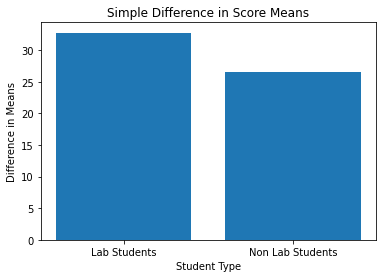

In [281]:
#Here, I am finding a simple difference in means

lab_students = data[data['lab'] == 1]
non_lab_students = data[data['lab'] == 0]

lab_students

diff_means_lab = np.mean(lab_students.score.values) - np.mean(lab_students.past_score.values)
diff_means_non_lab = np.mean(non_lab_students.score.values) - np.mean(non_lab_students.past_score.values)

plt.bar(x=["Lab Students", "Non Lab Students"],height=[diff_means_lab,diff_means_non_lab])
plt.title("Simple Difference in Score Means")
plt.ylabel("Difference in Means")
plt.xlabel("Student Type")

In [282]:
#Next, I will create a new column which contains the differences in test scores, effectively using the scores themselves instead of their means.
diff_score = data.score.values-data.past_score.values
data["diff_score"] = diff_score
data

,past_score,dist,income,lab,score,gender,race,income_bucket,plays_sports,student_id,lat,long,diff_score
0,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0,-0.707159
1,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0,-0.707159
2,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0,2.295087
3,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0,2.295087
4,7.726480,11.057883,96508.386987,0,8.544586,M,W,4,0,3,0.0,0.0,0.818107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.622634,6.261940,83605.153696,0,7.496355,M,hispanic,4,soccer,4998,0.0,0.0,-0.126278
9996,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0,1.450356
9997,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0,1.450356
9998,7.267171,5.939984,73821.218997,1,7.744949,F,H,3,0,5000,0.0,0.0,0.477779


In [283]:
#Here, I run a simple regression for diff_scores, taking into account whether or not the student goes to lab.
import statsmodels.formula.api as smf
results = smf.ols('diff_score ~ lab', data=data).fit()
print(results.summary())

# According to the simple linear regression of diff_score on the basis of lab attendance, the coefficient of lab (Beta1) is 2.8373, which means that a student who went to lab experienced an improvement in score 2.8373 points greater than that of a non-lab school students. The error for B1 is  2.706. Since the p value is fairly high, 0.294, we cannot reliably accept the proposition that LLS attendance increases students’ test scores. The coefficient is nevertheless plausible.
# results = smf.ols('diff_score ~ past_score + C(lab)', data=data).fit()

                            OLS Regression Results                            
Dep. Variable:             diff_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.099
Date:                Mon, 12 Apr 2021   Prob (F-statistic):              0.294
Time:                        22:40:14   Log-Likelihood:                -64425.
No. Observations:               10000   AIC:                         1.289e+05
Df Residuals:                    9998   BIC:                         1.289e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.4349      1.729     15.871      0.0

In [284]:
results = smf.ols('diff_score ~ lab + dist + income + gender + race + plays_sports', data=data).fit()
print(results.summary())

#According to the OLS regression which includes covariates dist, income, gender, race, and play_sports, the derived influence of lab school attendance on difference in score means is 4.9683 (Beta1). The standard error is 3.391.

#If we recall, the B1 for the simple regression between the difference of scores was 2.8373 with a standard error of 2.706. The B1 for the OLS regression incorporating covariates is lower: 2.00881. This decreased coefficient implies that lab school attendance plays a smaller role in the increase in students’ test scores than we expected. The standard error for the second regression is 2.721. Given this disparity, we must now take a look into which covariates actually have an impact on whether or not a student is accepted into the lab school.

                            OLS Regression Results                            
Dep. Variable:             diff_score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.967
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.36e-05
Time:                        22:40:14   Log-Likelihood:                -64399.
No. Observations:               10000   AIC:                         1.288e+05
Df Residuals:                    9981   BIC:                         1.290e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [285]:
# All true:

all(isinstance(x, float) for x in data.past_score.values)
all(isinstance(x, float) for x in data.dist.values)
all(isinstance(x, float) for x in data.income.values)

# False:
all(isinstance(x, int) for x in data.lab.values)


False

In [286]:
# I decided to take a look at the lab variable, and see if there were any values outside of 0 and 1. Turns out there were. Since I don't know if -1 or 3 should've been 0 or 1, I will delete all rows that have -1 or 3 as their "lab" entry.

pd.Series(data.lab.values).value_counts()

 0    6752
 1    2938
-1     206
 3     104
dtype: int64

In [287]:
data.drop(data[data['lab'] > 1].index, inplace = True)
data.drop(data[data['lab'] < 0].index, inplace = True)
data

,past_score,dist,income,lab,score,gender,race,income_bucket,plays_sports,student_id,lat,long,diff_score
0,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0,-0.707159
1,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0,-0.707159
2,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0,2.295087
3,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0,2.295087
4,7.726480,11.057883,96508.386987,0,8.544586,M,W,4,0,3,0.0,0.0,0.818107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.622634,6.261940,83605.153696,0,7.496355,M,hispanic,4,soccer,4998,0.0,0.0,-0.126278
9996,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0,1.450356
9997,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0,1.450356
9998,7.267171,5.939984,73821.218997,1,7.744949,F,H,3,0,5000,0.0,0.0,0.477779


In [288]:
pd.Series(data.lab.values).value_counts()
data.rename(columns={"lab": "lab_c"})

,past_score,dist,income,lab_c,score,gender,race,income_bucket,plays_sports,student_id,lat,long,diff_score
0,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0,-0.707159
1,8.091553,11.586920,67111.784934,0,7.384394,male,H,3,0,1,0.0,0.0,-0.707159
2,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0,2.295087
3,7.924539,7858.126614,93442.563796,1,10.219626,F,W,4,0,2,0.0,0.0,2.295087
4,7.726480,11.057883,96508.386987,0,8.544586,M,W,4,0,3,0.0,0.0,0.818107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.622634,6.261940,83605.153696,0,7.496355,M,hispanic,4,soccer,4998,0.0,0.0,-0.126278
9996,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0,1.450356
9997,8.273369,5032.773895,79180.694807,0,9.723725,female,H,3,baseball,4999,0.0,0.0,1.450356
9998,7.267171,5.939984,73821.218997,1,7.744949,F,H,3,0,5000,0.0,0.0,0.477779


In [289]:
#I also noticed that some students are listed twice. Here, I am deleting duplicate entries.
data.drop_duplicates(keep=False,inplace=True)
data = data.reset_index(drop=True)
data

,past_score,dist,income,lab,score,gender,race,income_bucket,plays_sports,student_id,lat,long,diff_score
0,7.788260,7325.012122,-99.000000,0,7.128806,F,H,1,1,4,41.848133,-87.638625,-0.659454
1,7.788260,7325.012122,65336.630160,0,7.128806,F,H,3,1,4,41.848133,-87.638625,-0.659454
2,7.306724,5.025144,58238.540761,0,7.083893,F,H,2,0,8,0.000000,0.000000,-0.222831
3,7.306724,5.025144,-99.000000,0,7.083893,F,H,1,0,8,0.000000,0.000000,-0.222831
4,5.226602,4.674310,62826.934945,0,4.931221,male,H,3,baseball,10,0.000000,0.000000,-0.295381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,5.587339,4.941026,-99.000000,1,4.180827,male,B,1,0,4976,0.000000,0.000000,-1.406512
2154,9.540431,8.405760,65127.624970,0,9.401269,female,H,3,0,4984,0.000000,0.000000,-0.139162
2155,9.540431,8.405760,-99.000000,0,9.401269,female,H,1,0,4984,0.000000,0.000000,-0.139162
2156,6.063074,4.096393,56858.200139,1,6.855088,F,H,2,tennis,4986,0.000000,0.000000,0.792014


In [290]:
#Checking the plays_sports variable
pd.Series(data.plays_sports.values).value_counts()

0             1314
1              464
tennis          74
soccer          72
baseball        68
gymnastics      60
volleyball      56
basketball      50
dtype: int64

In [291]:
#Since all values of plays_sports should be 0 or 1, I am converting all non binary values to 0,1
sport_new = np.array([])
for i in data.plays_sports.values:
    if i == 'soccer' or i == 'gymnastics' or i == 'tennis' or i == 'basketball' or i == 'baseball' or i == 'volleyball':
        sport_new = np.append(sport_new, 1)
    elif int(i) == 1:
        sport_new = np.append(sport_new, 1)
    else:
        sport_new = np.append(sport_new, 0)

        

data['plays_sports_c'] = sport_new
data = data.drop(labels = "plays_sports", axis=1)
data

,past_score,dist,income,lab,score,gender,race,income_bucket,student_id,lat,long,diff_score,plays_sports_c
0,7.788260,7325.012122,-99.000000,0,7.128806,F,H,1,4,41.848133,-87.638625,-0.659454,1.0
1,7.788260,7325.012122,65336.630160,0,7.128806,F,H,3,4,41.848133,-87.638625,-0.659454,1.0
2,7.306724,5.025144,58238.540761,0,7.083893,F,H,2,8,0.000000,0.000000,-0.222831,0.0
3,7.306724,5.025144,-99.000000,0,7.083893,F,H,1,8,0.000000,0.000000,-0.222831,0.0
4,5.226602,4.674310,62826.934945,0,4.931221,male,H,3,10,0.000000,0.000000,-0.295381,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,5.587339,4.941026,-99.000000,1,4.180827,male,B,1,4976,0.000000,0.000000,-1.406512,0.0
2154,9.540431,8.405760,65127.624970,0,9.401269,female,H,3,4984,0.000000,0.000000,-0.139162,0.0
2155,9.540431,8.405760,-99.000000,0,9.401269,female,H,1,4984,0.000000,0.000000,-0.139162,0.0
2156,6.063074,4.096393,56858.200139,1,6.855088,F,H,2,4986,0.000000,0.000000,0.792014,1.0


In [292]:
#Now, I will clean the gender column and make sure that all values are converted to "F" or "M".
# Cleaning the gender column

pd.Series(data.gender.values).value_counts()
gender_new = np.array([])
for i in data.gender.values:
    if i == "male":
        gender_new = np.append(gender_new, "M")
    elif i == "female":
        gender_new = np.append(gender_new, "F")
    else:
        gender_new = np.append(gender_new, i)


data['gender_c'] = gender_new
data = data.drop(labels = "gender", axis=1)
data


,past_score,dist,income,lab,score,race,income_bucket,student_id,lat,long,diff_score,plays_sports_c,gender_c
0,7.788260,7325.012122,-99.000000,0,7.128806,H,1,4,41.848133,-87.638625,-0.659454,1.0,F
1,7.788260,7325.012122,65336.630160,0,7.128806,H,3,4,41.848133,-87.638625,-0.659454,1.0,F
2,7.306724,5.025144,58238.540761,0,7.083893,H,2,8,0.000000,0.000000,-0.222831,0.0,F
3,7.306724,5.025144,-99.000000,0,7.083893,H,1,8,0.000000,0.000000,-0.222831,0.0,F
4,5.226602,4.674310,62826.934945,0,4.931221,H,3,10,0.000000,0.000000,-0.295381,1.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,5.587339,4.941026,-99.000000,1,4.180827,B,1,4976,0.000000,0.000000,-1.406512,0.0,M
2154,9.540431,8.405760,65127.624970,0,9.401269,H,3,4984,0.000000,0.000000,-0.139162,0.0,F
2155,9.540431,8.405760,-99.000000,0,9.401269,H,1,4984,0.000000,0.000000,-0.139162,0.0,F
2156,6.063074,4.096393,56858.200139,1,6.855088,H,2,4986,0.000000,0.000000,0.792014,1.0,F


In [293]:
#Now, I will clean the race column

pd.Series(data.race.values).value_counts()

H           1176
B            312
hispanic     290
W            242
black         82
A             56
dtype: int64

In [294]:
#Cleaning the Race column
race_new = np.array([])
for i in data.race.values:
    if i == "hispanic":
        race_new = np.append(race_new, "H")
    elif i == "black":
        race_new = np.append(race_new, "B")
    else:
        race_new = np.append(race_new, i)


data['race_c'] = race_new
data = data.drop(labels = "race", axis=1)
data

,past_score,dist,income,lab,score,income_bucket,student_id,lat,long,diff_score,plays_sports_c,gender_c,race_c
0,7.788260,7325.012122,-99.000000,0,7.128806,1,4,41.848133,-87.638625,-0.659454,1.0,F,H
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,41.848133,-87.638625,-0.659454,1.0,F,H
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,0.000000,0.000000,-0.222831,0.0,F,H
3,7.306724,5.025144,-99.000000,0,7.083893,1,8,0.000000,0.000000,-0.222831,0.0,F,H
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,0.000000,0.000000,-0.295381,1.0,M,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,5.587339,4.941026,-99.000000,1,4.180827,1,4976,0.000000,0.000000,-1.406512,0.0,M,B
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,0.000000,0.000000,-0.139162,0.0,F,H
2155,9.540431,8.405760,-99.000000,0,9.401269,1,4984,0.000000,0.000000,-0.139162,0.0,F,H
2156,6.063074,4.096393,56858.200139,1,6.855088,2,4986,0.000000,0.000000,0.792014,1.0,F,H


In [295]:
#Now, I will examine the lat and long columns, which look peculiar since most values seem to be 0.0/
pd.Series(data.long.values).value_counts()

#Most lat and long values are missing (1900 our of 2158 values total). So I will be dropping both the lat and long columns.

 0.000000     1900
-87.598494       2
-87.538340       2
-87.579781       2
-87.644442       2
              ... 
-87.638625       2
-87.709523       2
-87.513552       2
-87.597175       2
-87.532172       2
Length: 130, dtype: int64

In [296]:
data = data.drop(labels=['lat','long'],axis=1)
data

,past_score,dist,income,lab,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c
0,7.788260,7325.012122,-99.000000,0,7.128806,1,4,-0.659454,1.0,F,H
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H
3,7.306724,5.025144,-99.000000,0,7.083893,1,8,-0.222831,0.0,F,H
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H
...,...,...,...,...,...,...,...,...,...,...,...
2153,5.587339,4.941026,-99.000000,1,4.180827,1,4976,-1.406512,0.0,M,B
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H
2155,9.540431,8.405760,-99.000000,0,9.401269,1,4984,-0.139162,0.0,F,H
2156,6.063074,4.096393,56858.200139,1,6.855088,2,4986,0.792014,1.0,F,H


In [297]:
#I also noticed that some student ID's pop up twice in the data, and it looks some of the ID's repeat, and in the duplicates, the only item that is different is the income, which is listed as -99.00.

income_faulties = data[data['income'] == -99.000000]
neg99vals = income_faulties.student_id.values 

len(neg99vals)

1079

In [298]:
pd.Series(data.student_id.values).value_counts()

2047    2
1302    2
3405    2
1356    2
3397    2
       ..
575     2
4669    2
565     2
2612    2
4       2
Length: 1079, dtype: int64

In [299]:
neg_income = data[data['income'] < 0]
pd.Series(neg_income.income.values).value_counts()
#Because all of the negative income values are -99.00, we can reasonably assume that all of the -99.00 income values are false entries. Hence, I will delete all rows containing -99.00 in the income column.
data = data[data['income'] != -99.000000]
data

,past_score,dist,income,lab,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H
...,...,...,...,...,...,...,...,...,...,...,...
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H


In [300]:
#Here, I am checking to see if the lab columns has any missing vals 
sum(data.lab.isnull())

0

In [301]:
data = data.rename(columns={"income": "income_c"})
data = data.rename(columns={"lab": "lab_c"})

In [302]:
lab_st = data[data['lab_c'] == 1]
lab_st

non_lab_st = data[data['lab_c'] == 0]
non_lab_st

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H
12,8.107442,8122.431233,56574.192995,0,6.789739,2,24,-1.317702,1.0,M,H
...,...,...,...,...,...,...,...,...,...,...,...
2142,8.279837,6.181624,60996.381325,0,8.670023,3,4938,0.390186,0.0,F,B
2145,7.539819,5.851797,42985.043731,0,7.872688,2,4947,0.332869,1.0,M,H
2146,4.773481,2.281250,31797.951251,0,4.679412,1,4953,-0.094069,1.0,F,B
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H


Text(0.5, 0, 'Test Score')

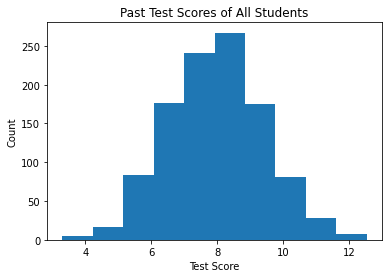

In [303]:
# Now, I will start examining each variable individually from the pool of all students as well as just lab students. As long as the graphs for all the students and that of the lab students look the same, the student selection process should've been random.

plt.hist(data.past_score.values)
plt.title("Past Test Scores of All Students")
plt.ylabel("Count")
plt.xlabel("Test Score")



Text(0.5, 0, 'Test Score')

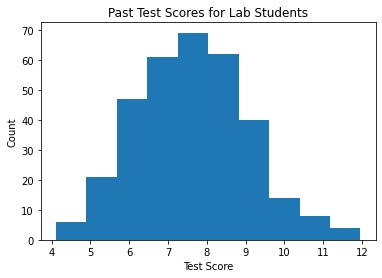

In [304]:
plt.hist(lab_st.past_score.values)
plt.title("Past Test Scores for Lab Students")
plt.ylabel("Count")
plt.xlabel("Test Score")

Text(0.5, 0, 'Distance')

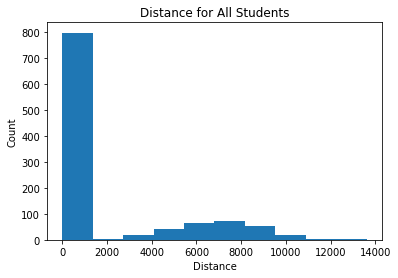

In [305]:
plt.hist(data.dist.values)
plt.title("Distance for All Students")
plt.ylabel("Count")
plt.xlabel("Distance")

Text(0.5, 0, 'Distance')

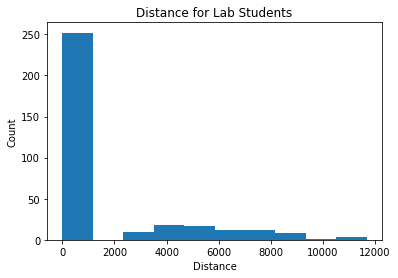

In [306]:
plt.hist(lab_st.dist.values)
plt.title("Distance for Lab Students")
plt.ylabel("Count")
plt.xlabel("Distance")

Text(0.5, 0, 'Income')

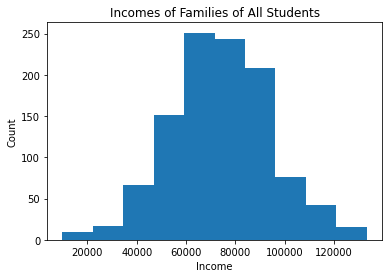

In [307]:
plt.hist(data.income_c.values)
plt.title("Incomes of Families of All Students")
plt.ylabel("Count")
plt.xlabel("Income")


Text(0.5, 0, 'Income')

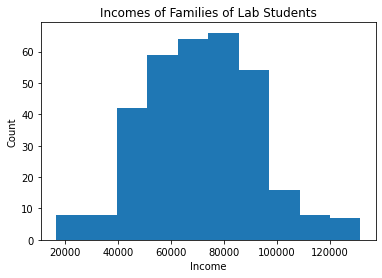

In [308]:
plt.hist(lab_st.income_c.values)
plt.title("Incomes of Families of Lab Students")
plt.ylabel("Count")
plt.xlabel("Income")

Text(0.5, 0, 'Score')

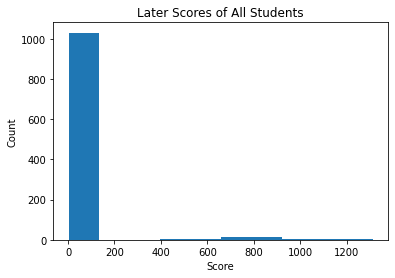

In [309]:
plt.hist(data.score.values)
plt.title("Later Scores of All Students")
plt.ylabel("Count")
plt.xlabel("Score")
#There seem to be 2 clusters in later scores

#SCALE THESE

Text(0.5, 0, 'Score')

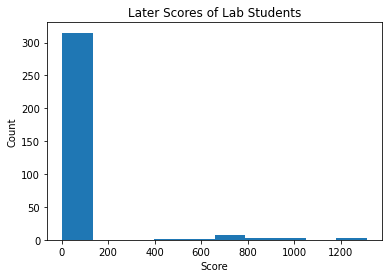

In [310]:
plt.hist(lab_st.score.values)
plt.title("Later Scores of Lab Students")
plt.ylabel("Count")
plt.xlabel("Score")

Text(0.5, 0, 'Score')

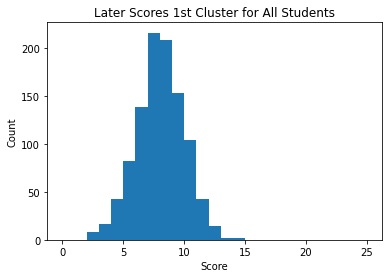

In [311]:
#Cluster 1 is here
plt.hist(data.score.values, bins=range(0, 26, 1))
plt.title("Later Scores 1st Cluster for All Students")
plt.ylabel("Count")
plt.xlabel("Score")

Text(0.5, 0, 'Score')

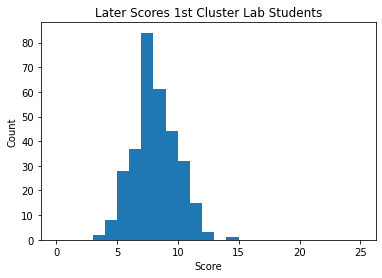

In [312]:
plt.hist(lab_st.score.values, bins=range(0, 26, 1))
plt.title("Later Scores 1st Cluster Lab Students")
plt.ylabel("Count")
plt.xlabel("Score")

Text(0.5, 0, 'Score')

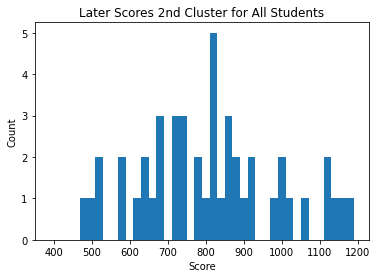

In [313]:
plt.hist(data.score.values, bins=range(390, 1200,20))
plt.title("Later Scores 2nd Cluster for All Students")
plt.ylabel("Count")
plt.xlabel("Score")

Text(0.5, 0, 'Score')

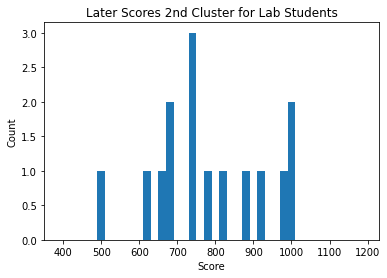

In [314]:
plt.hist(lab_st.score.values, bins=range(390, 1200,20))
plt.title("Later Scores 2nd Cluster for Lab Students")
plt.ylabel("Count")
plt.xlabel("Score")

In [315]:
# I decided to log the scores data in order to standardize it

past_score_mutated = np.log(data.past_score.values)

score_mutated = np.log(data.score.values)

data["past_score_log"] = past_score_mutated
data['score_log'] = score_mutated
data.drop(labels = ["past_score_m","score_m"], axis=1)

KeyError: "['past_score_m' 'score_m'] not found in axis"

In [ ]:
pd.Series(data.gender_c.values).value_counts()

genders = np.array(["F","M"])
counts = np.array([pd.Series(data.gender_c.values).value_counts()[0], pd.Series(data.gender_c.values).value_counts()[1]])
plt.bar(genders, counts)
plt.title("Genders of All Students")
plt.ylabel("Count")
plt.xlabel("Gender")

In [ ]:
pd.Series(lab_st.gender_c.values).value_counts()
genders = np.array(["F","M"])
counts = np.array([pd.Series(lab_st.gender_c.values).value_counts()[0], pd.Series(lab_st.gender_c.values).value_counts()[1]])
plt.bar(genders, counts)
plt.title("Genders of Lab Students")
plt.ylabel("Count")
plt.xlabel("Gender")

In [ ]:
plt.hist(data.race_c.values)
plt.title("Race of All Students")
plt.ylabel("Count")
plt.xlabel("Race")
#The pool of students that were placed into the lottery consists predominantly of hispanic students

Text(0.5, 0, 'Race')

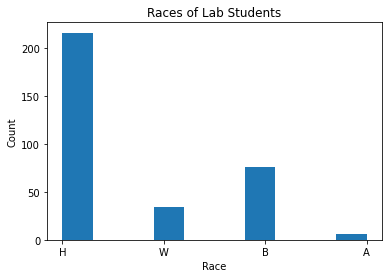

In [316]:
plt.hist(lab_st.race_c.values)
plt.title("Races of Lab Students")
plt.ylabel("Count")
plt.xlabel("Race")
#The relative proportions of the races of students selected to attend lab and the original pool of potential students approximately match. This means that race-based selected likely did not occur.

Text(0.5, 0, 'Income Bucket')

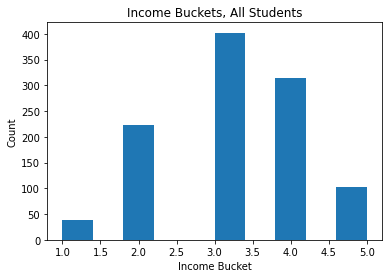

In [317]:
plt.hist(data.income_bucket.values)
plt.title("Income Buckets, All Students")
plt.ylabel("Count")
plt.xlabel("Income Bucket")

Text(0.5, 0, 'Income Bucket')

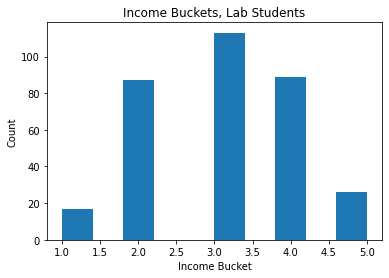

In [318]:
plt.hist(lab_st.income_bucket.values)
plt.title("Income Buckets, Lab Students")
plt.ylabel("Count")
plt.xlabel("Income Bucket")

Text(0.5, 1.0, 'Plays_Sports')

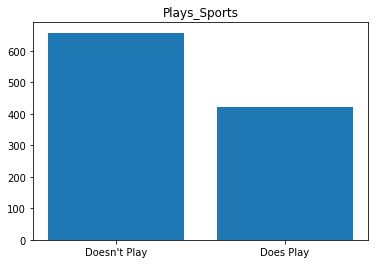

In [319]:
pd.Series(data.plays_sports_c.values).value_counts()
sport_status = np.array(["Doesn't Play", "Does Play"])
plt.bar(sport_status, [pd.Series(data.plays_sports_c.values).value_counts()[0],pd.Series(data.plays_sports_c.values).value_counts()[1]])
plt.title("Plays_Sports")

Text(0.5, 1.0, 'Plays_Sports for Lab Students')

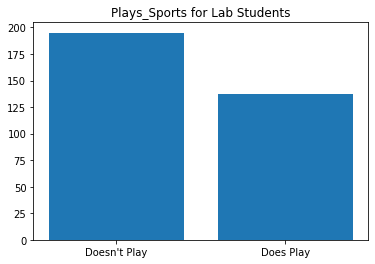

In [320]:
pd.Series(lab_st.plays_sports_c.values).value_counts()
sport_status = np.array(["Doesn't Play", "Does Play"])
plt.bar(sport_status, [pd.Series(lab_st.plays_sports_c.values).value_counts()[0],pd.Series(lab_st.plays_sports_c.values).value_counts()[1]])
plt.title("Plays_Sports for Lab Students")

Text(0, 0.5, 'Mean Score Difference')

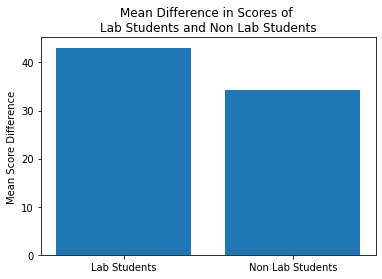

In [321]:
# First, use a simple difference in test score means of those who won or lost the lottery.
# difference of scores

lab_st_diff_mean = np.mean(lab_st.score.values-lab_st.past_score.values)
lab_st_diff_mean

non_lab_st_diff_mean = np.mean(non_lab_st.score.values-non_lab_st.past_score.values)
non_lab_st_diff_mean

plt.bar(["Lab Students", "Non Lab Students"], [lab_st_diff_mean, non_lab_st_diff_mean])
plt.title("Mean Difference in Scores of \nLab Students and Non Lab Students")
plt.ylabel("Mean Score Difference")

Text(0.5, 0, 'Logged Score')

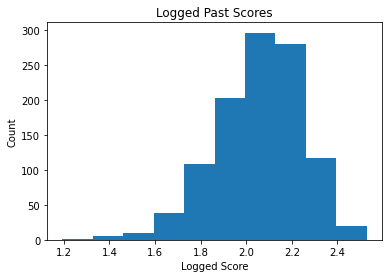

In [322]:
plt.hist(data.past_score_log.values)
plt.title("Logged Past Scores")
plt.ylabel("Count")
plt.xlabel("Logged Score")


Text(0.5, 0, 'Logged Score')

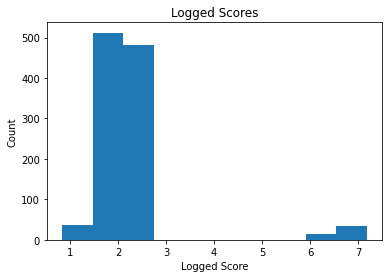

In [323]:
plt.hist(data.score_log.values)
plt.title("Logged Scores")
plt.ylabel("Count")
plt.xlabel("Logged Score")


In [324]:
data

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H,2.052617,1.964144
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H,1.988795,1.957824
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H,1.653761,1.595587
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H,2.363555,2.384424
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H,2.271348,2.380016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H,2.184408,1.916857
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H,2.000494,2.039756
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B,1.720503,1.430509
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H,2.255539,2.240845


Text(0.5, 0, 'Student Type')

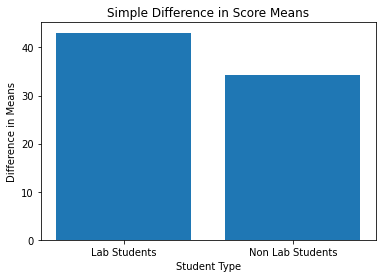

In [325]:
# With your cleaned data, re-estimate and report the treatment effects for the two methods in question 1, assuming the randomization is valid.
lab_students = data[data['lab_c'] == 1]
non_lab_students = data[data['lab_c'] == 0]

lab_students

diff_means_lab = np.mean(lab_students.score.values) - np.mean(lab_students.past_score.values)
diff_means_non_lab = np.mean(non_lab_students.score.values) - np.mean(non_lab_students.past_score.values)

plt.bar(x=["Lab Students", "Non Lab Students"],height=[diff_means_lab,diff_means_non_lab])
plt.title("Simple Difference in Score Means")
plt.ylabel("Difference in Means")
plt.xlabel("Student Type")


In [326]:
data

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H,2.052617,1.964144
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H,1.988795,1.957824
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H,1.653761,1.595587
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H,2.363555,2.384424
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H,2.271348,2.380016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H,2.184408,1.916857
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H,2.000494,2.039756
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B,1.720503,1.430509
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H,2.255539,2.240845


Text(0.5, 0, 'Student Type')

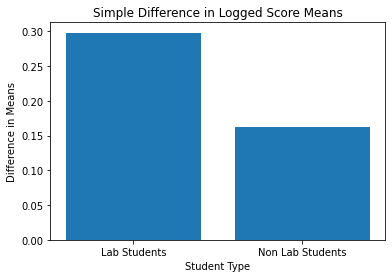

In [327]:
lab_students = data[data['lab_c'] == 1]
non_lab_students = data[data['lab_c'] == 0]

lab_students

diff_means_lab = np.mean(lab_students.score_log.values) - np.mean(lab_students.past_score_log.values)
diff_means_non_lab = np.mean(non_lab_students.score_log.values) - np.mean(non_lab_students.past_score_log.values)

plt.bar(x=["Lab Students", "Non Lab Students"],height=[diff_means_lab,diff_means_non_lab])
plt.title("Simple Difference in Logged Score Means")
plt.ylabel("Difference in Means")
plt.xlabel("Student Type")

In [328]:
data
diff_score = data.score_log.values-data.past_score_log.values
data["diff_score_log"] = diff_score
data

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log,diff_score_log
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H,2.052617,1.964144,-0.088474
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H,1.988795,1.957824,-0.030971
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H,1.653761,1.595587,-0.058175
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H,2.363555,2.384424,0.020870
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H,2.271348,2.380016,0.108668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H,2.184408,1.916857,-0.267551
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H,2.000494,2.039756,0.039262
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B,1.720503,1.430509,-0.289994
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H,2.255539,2.240845,-0.014694


In [329]:
results = smf.ols('diff_score_log ~ C(lab_c)', data=data).fit()
print(results.summary())

# Next, I proceeded to conduct a simple linear regression with cleaned lab_c and logged scores variables. The B1 for the simple regression between lab student status and improvement in test scores is now significantly lower than that of the previous regressions: 0.1360. The Standard error is 0.064

                            OLS Regression Results                            
Dep. Variable:         diff_score_log   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.451
Date:                Mon, 12 Apr 2021   Prob (F-statistic):             0.0351
Time:                        22:40:25   Log-Likelihood:                -1505.4
No. Observations:                1079   AIC:                             3015.
Df Residuals:                    1077   BIC:                             3025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1620      0.036      4.529

In [330]:
results = smf.ols('diff_score_log ~ C(lab_c) + dist + C(income_bucket) + gender_c + race_c + C(plays_sports_c)', data=data).fit()
print(results.summary())

#According to the linear regression which includes covariates, the weight of whether a student's lab school attendee status on their change in test scores is 9.5464 (B1). The standard error of this estimate is 11.602.


                            OLS Regression Results                            
Dep. Variable:         diff_score_log   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.902
Date:                Mon, 12 Apr 2021   Prob (F-statistic):             0.0355
Time:                        22:40:25   Log-Likelihood:                -1497.2
No. Observations:                1079   AIC:                             3018.
Df Residuals:                    1067   BIC:                             3078.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [331]:
# What are the differences in results between the two methods?

# NEW ANSWER:
# According to the linear regression, the weight of whether a student's lab school attendee status on their change in test scores is 0.1376 (B1). The standard error of this estimate is 0.065.
# In the second method which includes covariates, the weight of whether or not a student attended lab on change in test scores is slightly greater than that of the first method. The second method also shows that income_bucket has a relatively strong correlation with the change in students' test scores.  
# Relative to the income_bucket and race variables, the impact of the school is small. At 0.1376, is smaller magnitude than, for example, the B1 for the 2nd income bucket, 0.2889.
# While the estimate for the impact of lab attendance is relatively small, the estimate derived from the second method is more convincing since all provided covariates have been accounted for. The only caveat here is that the standard error for the B1 derived from the second method is greater than that of the first method, which implies that the estimate from the second method is slightly less reliable.



#OLD ANSWERS:

# In the second method which includes covariates, the weight of whether or not a student attended lab on change in test scores is greater than that of the first method. (B1 of 9.5464 vs. 8.8032) The second method also shows that race has a strong correlation with the change in students' test scores.  

In [332]:
# Do the estimates imply a big or small impact of the school?  Positive or negative? 

#Relative to the race and plays_sports variables, the impact of the school is small. At 9.5464, the B1 for lab is positive and yet smaller in magnitude than, for example, the B1 if a student is white (-98.4636).


In [333]:
# Is one estimate more convincing than the other? 

# While the estimate for the impact of lab attendance is relatively small, the estimate derived from the second method is more convincing since all provided covariates have been accounted for. The only caveat here is that the standard error for the B1 derived from the second method is greater than that of the first method, which implies that the estimate from the second method is slightly less reliable. 

In [334]:
# Professor Levitt sometimes makes mistakes. What evidence would you present to convince him that acceptance to LLS is not determined by a valid lottery?

data

#investigate correlation between lab_c and all the other vars

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log,diff_score_log
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H,2.052617,1.964144,-0.088474
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H,1.988795,1.957824,-0.030971
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H,1.653761,1.595587,-0.058175
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H,2.363555,2.384424,0.020870
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H,2.271348,2.380016,0.108668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H,2.184408,1.916857,-0.267551
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H,2.000494,2.039756,0.039262
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B,1.720503,1.430509,-0.289994
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H,2.255539,2.240845,-0.014694


In [335]:
#Here, I am investingating the relationship between lab_c and all the other variables

results = smf.ols('lab_c ~ C(plays_sports_c)+past_score + dist + income_c + gender_c + race_c', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lab_c   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     4.729
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.02e-05
Time:                        22:40:26   Log-Likelihood:                -678.02
No. Observations:                1079   AIC:                             1374.
Df Residuals:                    1070   BIC:                             1419.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [336]:
# Using the above method, I have not found a significant correlation between any variables and status as a student at the lab school

In [337]:
results = smf.ols('lab_c ~ past_score', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lab_c   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     28.08
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.41e-07
Time:                        22:40:26   Log-Likelihood:                -682.88
No. Observations:                1079   AIC:                             1370.
Df Residuals:                    1077   BIC:                             1380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7121      0.078      9.181      0.0

In [338]:
results = smf.ols('lab_c ~ income_c', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lab_c   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     9.007
Date:                Mon, 12 Apr 2021   Prob (F-statistic):            0.00275
Time:                        22:40:26   Log-Likelihood:                -692.27
No. Observations:                1079   AIC:                             1389.
Df Residuals:                    1077   BIC:                             1399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4612      0.053      8.698      0.0

Text(0.5, 0, 'Income')

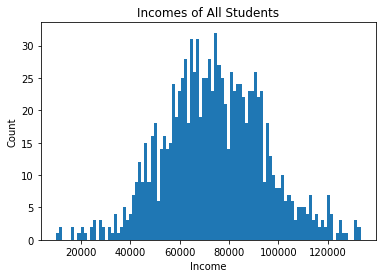

In [339]:
plt.hist(data.income_c.values, bins = 100)
plt.title("Incomes of All Students")
plt.ylabel("Count")
plt.xlabel("Income")

Text(0.5, 0, 'Income')

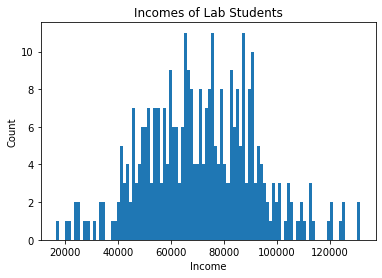

In [340]:
plt.hist(lab_st.income_c.values, bins = 100)
plt.title("Incomes of Lab Students")
plt.ylabel("Count")
plt.xlabel("Income")

In [341]:
#Since the coefficient for plays_sports_c (10.5361) variable was greater than that of the lab_c variable (9.5464) in the second analysis method, I will be investigating the potential role of play_sports in a students' accepts to the lab school.

# Find proportion of all students that play sports. Then compare to proportion of lab students who play sports

prop_sp_all = sum(data.plays_sports_c.values)/len(data.plays_sports_c.values)
prop_sp_all

prop_sp_lab = sum(lab_st.plays_sports_c.values)/len(lab_st.plays_sports_c.values)
prop_sp_lab

0.4126506024096386

Text(0.5, 1.0, 'Proportion of Students who Play Sports')

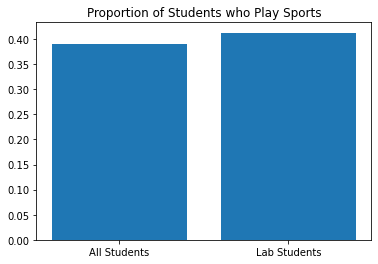

In [342]:
plt.bar(x=["All Students", "Lab Students"], height = [prop_sp_all, prop_sp_lab])
plt.title("Proportion of Students who Play Sports")

Text(0.5, 0, 'Income Bucket')

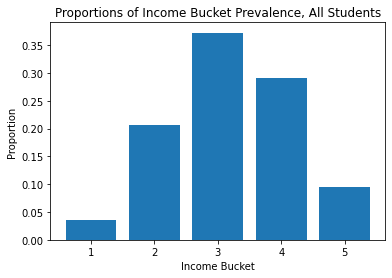

In [343]:
series = pd.Series(data.income_bucket.values).value_counts()
total_incomeb_counts = sum(pd.Series(data.income_bucket.values).value_counts()[0:5])
total_incomeb_counts

array1 = np.array([1,2,3,4,5])
props = np.array([series[1]/total_incomeb_counts, series[2]/total_incomeb_counts, series[3]/total_incomeb_counts,series[4]/total_incomeb_counts, series[5]/total_incomeb_counts])

plt.bar(x=array1, height=props)
plt.title("Proportions of Income Bucket Prevalence, All Students")
plt.ylabel("Proportion")
plt.xlabel("Income Bucket")


Text(0.5, 0, 'Income Bucket')

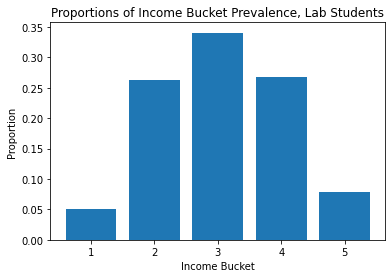

In [344]:
series = pd.Series(lab_st.income_bucket.values).value_counts()
total_incomeb_counts = sum(pd.Series(lab_st.income_bucket.values).value_counts()[0:5])
total_incomeb_counts

array1 = np.array([1,2,3,4,5])
props = np.array([series[1]/total_incomeb_counts, series[2]/total_incomeb_counts, series[3]/total_incomeb_counts,series[4]/total_incomeb_counts, series[5]/total_incomeb_counts])

plt.bar(x=array1, height=props)
plt.title("Proportions of Income Bucket Prevalence, Lab Students")
plt.ylabel("Proportion")
plt.xlabel("Income Bucket")

In [345]:
# If we compare the two graphs above, we find that the proportion of students accepted into the lab school that are in income bucket 2 is significantly than the number of students in the original pre-decision pool of all students. In addition, the proportion of students in the first income bucket that were accepted into the lab schools is slightly greater than that of the original pool of all students. Such a disparity in the proportion of students in income buckets 1 and 2 pre and post enrollment decisions suggests that acceptance into the lab school was not conducted on the basis of randomization.

In [346]:
data

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log,diff_score_log
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H,2.052617,1.964144,-0.088474
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H,1.988795,1.957824,-0.030971
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H,1.653761,1.595587,-0.058175
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H,2.363555,2.384424,0.020870
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H,2.271348,2.380016,0.108668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H,2.184408,1.916857,-0.267551
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H,2.000494,2.039756,0.039262
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B,1.720503,1.430509,-0.289994
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H,2.255539,2.240845,-0.014694


In [347]:
results = smf.ols('lab_c ~ C(income_bucket)+dist+past_score+plays_sports_c+gender_c+race_c', data=data).fit()
print(results.summary())

#NOTE: THE DATA DOESN'T SUPPORT HYPOTHESIS

                            OLS Regression Results                            
Dep. Variable:                  lab_c   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.863
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.72e-05
Time:                        22:40:27   Log-Likelihood:                -675.69
No. Observations:                1079   AIC:                             1375.
Df Residuals:                    1067   BIC:                             1435.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.69

In [348]:
data.corr()

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,past_score_log,score_log,diff_score_log
past_score,1.000000,0.106717,0.498572,-0.159416,0.042550,0.481162,0.024794,0.034264,-0.087959,0.990545,0.200628,0.012947
dist,0.106717,1.000000,0.093775,-0.079795,-0.003553,0.093604,-0.051731,-0.004440,0.000271,0.106556,0.006149,-0.014368
income_c,0.498572,0.093775,1.000000,-0.091072,0.042270,0.953660,0.030170,0.038145,-0.048474,0.494417,0.142286,0.049504
lab_c,-0.159416,-0.079795,-0.091072,1.000000,0.021931,-0.095558,0.006433,0.023261,0.029437,-0.157308,0.032969,0.064154
score,0.042550,-0.003553,0.042270,0.021931,1.000000,0.043721,-0.003880,0.999966,0.025081,0.040761,0.949221,0.961514
income_bucket,0.481162,0.093604,0.953660,-0.095558,0.043721,1.000000,0.013477,0.039741,-0.021617,0.479205,0.136447,0.046489
student_id,0.024794,-0.051731,0.030170,0.006433,-0.003880,0.013477,1.000000,-0.004087,-0.007113,0.029824,-0.008044,-0.013995
diff_score,0.034264,-0.004440,0.038145,0.023261,0.999966,0.039741,-0.004087,1.000000,0.025819,0.032552,0.947859,0.961713
plays_sports_c,-0.087959,0.000271,-0.048474,0.029437,0.025081,-0.021617,-0.007113,0.025819,1.000000,-0.082656,0.012568,0.028852
past_score_log,0.990545,0.106556,0.494417,-0.157308,0.040761,0.479205,0.029824,0.032552,-0.082656,1.000000,0.203497,0.014045


In [349]:
income_buck_2 = data[data['income_bucket'] == 2]
income_buck_1 = data[data['income_bucket'] == 1]
income_buck_3 = data[data['income_bucket'] == 3]
income_buck_4 = data[data['income_bucket'] == 4]
income_buck_5 = data[data['income_bucket'] == 5]

In [350]:
income_buck_2

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log,diff_score_log
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H,1.988795,1.957824,-0.030971
10,7.371716,5.266566,53833.858051,1,7.568088,2,22,0.196372,0.0,F,W,1.997650,2.023940,0.026290
12,8.107442,8122.431233,56574.192995,0,6.789739,2,24,-1.317702,1.0,M,H,2.092782,1.915413,-0.177370
20,8.250903,8.103880,52961.633008,0,8.749072,2,38,0.498169,0.0,M,H,2.110323,2.168948,0.058625
39,8.011841,5.407821,42104.148510,0,7.331513,2,77,-0.680328,1.0,F,B,2.080921,1.992182,-0.088739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,6.692704,5.947786,49981.205774,1,666.749807,2,4917,660.057103,0.0,M,B,1.901018,6.502415,4.601397
2137,5.669864,6.104506,42521.815326,1,5.240256,2,4930,-0.429608,1.0,M,H,1.735165,1.656370,-0.078795
2145,7.539819,5.851797,42985.043731,0,7.872688,2,4947,0.332869,1.0,M,H,2.020198,2.063400,0.043201
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B,1.720503,1.430509,-0.289994


Text(0, 0.5, 'Count')

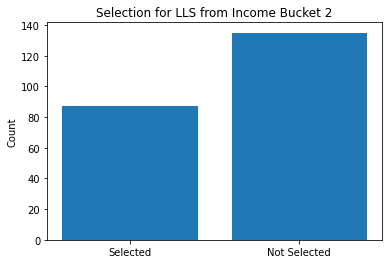

In [351]:
# If random, should be approximately 50
lab_selected_from_ib2 = sum(income_buck_2.lab_c.values)
not_selected_from_ib2 =  len(income_buck_2.lab_c.values)-lab_selected_from_ib2
prop2 = lab_selected_from_ib2/(lab_selected_from_ib2+not_selected_from_ib2)

plt.bar(x=["Selected", "Not Selected"], height=[lab_selected_from_ib2,not_selected_from_ib2])
plt.title("Selection for LLS from Income Bucket 2")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

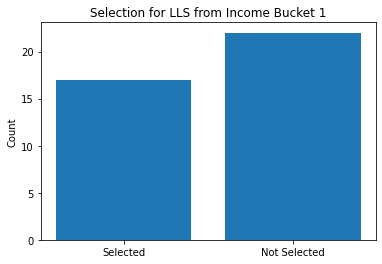

In [352]:
lab_selected_from_ib1 = sum(income_buck_1.lab_c.values)
not_selected_from_ib1 =  len(income_buck_1.lab_c.values)-lab_selected_from_ib1
prop1 = lab_selected_from_ib1/(lab_selected_from_ib1+not_selected_from_ib1)

plt.bar(x=["Selected", "Not Selected"], height=[lab_selected_from_ib1,not_selected_from_ib1])
plt.title("Selection for LLS from Income Bucket 1")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

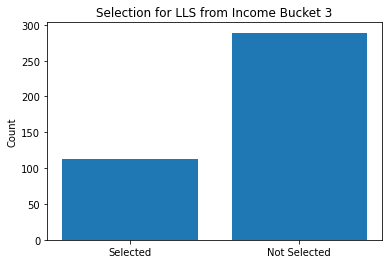

In [353]:
lab_selected_from_ib3 = sum(income_buck_3.lab_c.values)
not_selected_from_ib3 =  len(income_buck_3.lab_c.values)-lab_selected_from_ib3
prop3 = lab_selected_from_ib3/(lab_selected_from_ib3+not_selected_from_ib3)

plt.bar(x=["Selected", "Not Selected"], height=[lab_selected_from_ib3,not_selected_from_ib3])
plt.title("Selection for LLS from Income Bucket 3")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

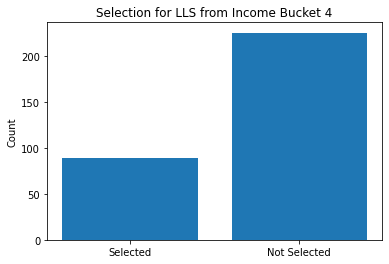

In [354]:
lab_selected_from_ib4 = sum(income_buck_4.lab_c.values)
not_selected_from_ib4 =  len(income_buck_4.lab_c.values)-lab_selected_from_ib4
prop4 = lab_selected_from_ib4/(lab_selected_from_ib4+not_selected_from_ib4)

plt.bar(x=["Selected", "Not Selected"], height=[lab_selected_from_ib4,not_selected_from_ib4])
plt.title("Selection for LLS from Income Bucket 4")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

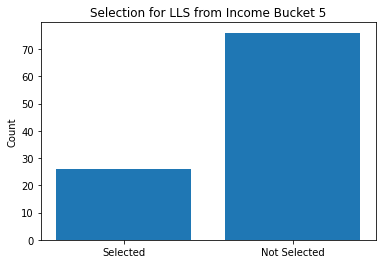

In [355]:
lab_selected_from_ib5 = sum(income_buck_5.lab_c.values)
not_selected_from_ib5 =  len(income_buck_5.lab_c.values)-lab_selected_from_ib5
prop5 = lab_selected_from_ib5/(lab_selected_from_ib5+not_selected_from_ib5)

plt.bar(x=["Selected", "Not Selected"], height=[lab_selected_from_ib5,not_selected_from_ib5])
plt.title("Selection for LLS from Income Bucket 5")
plt.ylabel("Count")

Text(0.5, 0, 'Income Buckets')

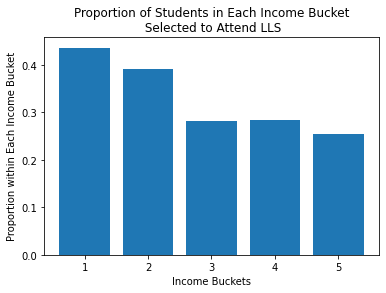

In [356]:
#A quick comparison of the charts above shows that far more students from income buckets 1 and two were selected than those of the other income buckets.

# proportions here
bucket = np.array([1,2,3,4,5])
props = np.array([prop1, prop2, prop3, prop4, prop5])

plt.bar(x=bucket, height=props)
plt.title("Proportion of Students in Each Income Bucket\n Selected to Attend LLS")
plt.ylabel("Proportion within Each Income Bucket")
plt.xlabel("Income Buckets")


#Conduct test 100 times where randomly assign students 0,1 status for lab, with 1's limited by sum(lab_c)

In [357]:
props

array([0.43589744, 0.39189189, 0.28109453, 0.28343949, 0.25490196])

In [358]:
#According to the bar chart above, it is clear that a greater proportion of students were selected from the first two income buckets than the last three. The proportion was developed via the following formula: # students from income bucket x selected for LLS/ total # of students from income bucket x in original pool pre-selection. 

In [359]:
bucket_analysis_df = data[['lab_c','income_bucket']]
bucket_analysis_df

,lab_c,income_bucket
1,0,3
2,0,2
4,0,3
7,0,5
9,1,4
...,...,...
2148,1,3
2150,0,3
2152,1,2
2154,0,3


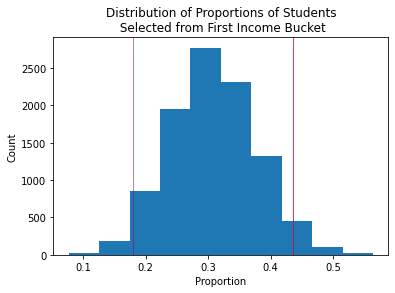

In [360]:
import random


#Here, I will be conducting bootstrap analysis. More specifically, I will leave the lab_c column, but randomize the entries in the income_bucket column. Then, I will re-calculate the proportions 100 times. I will then create a histogram will the derived proportions.  

#Maybe leave lab_c but randomize the income_bucket entries

#will be randomizing 100 times

props_for_b1 = np.array([])
for i in np.arange(10000): 
    #Substitute this array into the df
    array = bucket_analysis_df.income_bucket.values
    random.shuffle(array)
    #Focusing on proportions from bucket 1
    income_buck_1 = bucket_analysis_df[bucket_analysis_df['income_bucket'] == 1]
    lab_selected_from_ib1 = sum(income_buck_1.lab_c.values)
    not_selected_from_ib1 =  len(income_buck_1.lab_c.values)-lab_selected_from_ib1
    prop1 = lab_selected_from_ib1/(lab_selected_from_ib1+not_selected_from_ib1)
    props_for_b1 = np.append(props_for_b1, prop1)

plt.hist(props_for_b1)
plt.title("Distribution of Proportions of Students\n Selected from First Income Bucket")
plt.ylabel("Count")
plt.xlabel("Proportion")
plt.axvline(x=0.17949, color='purple', label='Sample Difference\nin means', linewidth=0.5)
plt.axvline(x=0.435897436, color='purple', label='Sample Difference\nin means', linewidth=0.5)
plt.axvline(x=0.43589744, color='red', label='Sample Difference\nin means', linewidth=0.5)


# bucket_analysis_df.income_bucket = new_buckets

# income_buck_1 = bucket_analysis_df[bucket_analysis_df['income_bucket'] == 1]
# lab_selected_from_ib1 = sum(income_buck_1.lab_c.values)
# not_selected_from_ib1 =  len(income_buck_1.lab_c.values)-lab_selected_from_ib1
# prop1 = lab_selected_from_ib1/(lab_selected_from_ib1+not_selected_from_ib1)

# prop1   
    
    

In [361]:
[np.quantile(props_for_b1, 0.05), np.quantile(props_for_b1, 0.95)]
# There is a 95% chance that the data lies between 0.17949 and 0.435897436. If the derived proportion lies betlow 0.179487179 or above 0.435897436, then we have adequate evidence to show that we are 95% confidence that acceptance into LLS was not conducted via randomization.

#The derived proportion for students in bucket 1 that were accepted into LLS out of all students in bucket 1 is 0.43589744, which IS indeed above the upper bound of the 95% confidence interval. Therefore, there is enough evidence to show that admissions into LLS was NOT conducted through randomization.

#The same analysis will be conducted for the population of students from the second income bucket.

[0.1794871794871795, 0.4358974358974359]

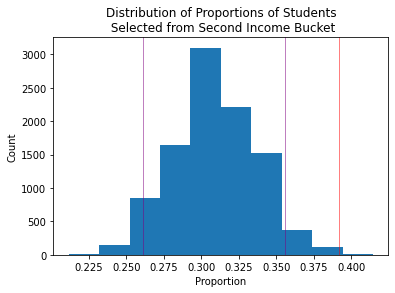

In [362]:
props_for_b2 = np.array([])
for i in np.arange(10000): 
    #Substitute this array into the df
    array = bucket_analysis_df.income_bucket.values
    random.shuffle(array)
    #Focusing on proportions from bucket 1
    income_buck_2 = bucket_analysis_df[bucket_analysis_df['income_bucket'] == 2]
    lab_selected_from_ib2 = sum(income_buck_2.lab_c.values)
    not_selected_from_ib2 =  len(income_buck_2.lab_c.values)-lab_selected_from_ib2
    prop2 = lab_selected_from_ib2/(lab_selected_from_ib2+not_selected_from_ib2)
    props_for_b2 = np.append(props_for_b2, prop2)

plt.hist(props_for_b2)
plt.title("Distribution of Proportions of Students\n Selected from Second Income Bucket")
plt.ylabel("Count")
plt.xlabel("Proportion")
plt.axvline(x=0.26126126, color='purple', label='Sample Difference\nin means', linewidth=0.5)
plt.axvline(x=0.355855856, color='purple', label='Sample Difference\nin means', linewidth=0.5)
plt.axvline(x=0.39189189, color='red', label='Sample Difference\nin means', linewidth=0.5)


In [363]:
[np.quantile(props_for_b2, 0.05), np.quantile(props_for_b2, 0.95)]
#According to the confidence interval above, there is a 95% chance that the true proportion of students selected from income bucket 2 to attend LLS lies between 0.26126126 and 0.355855856. If the derived proportion lies below the lower limit or above the upper limit, then we have adequate evidence to show that we are 95% confidence that acceptance into LLS was not conducted via randomization.

#The derived proportion for students in bucket 1 that were accepted into LLS out of all students in bucket 2 is 0.39189189, which IS indeed above the upper bound of the 95% confidence interval, 0.355855856. Therefore, there is additional evidence to show that admissions into LLS was NOT conducted through randomization.

#Based on our randomization-based analysis of the hypothetical proportion of accepted students from income buckets 1 and 2, we can confidently say some method other than randomization was used to determine who gets accepted into LLS and who doesn't. Given that a greater proportion of students within the first two income buckets were accepted relative to the whole population of students within their respective income buckets, we can deduct that a monetary method such as bribery may have been utilized to influence students' acceptance into LLS.


[0.26126126126126126, 0.35135135135135137]

In [364]:
# Assuming your hypothesis is correct, is it possible to estimate a causal impact of attending the school on test scores? 

# No, since other factors such as family income are potentially influencing the change in students' test scores. Since a greater proportion of students were selected from income buckets 1 and 2 relative to 3, 4, and 5, it is likely that there is an articifially greater proportion of relatively wealthy students attend LLS. The families of such students are likely more able to pay for private tutoring for students and other sources for academic support that are less accessible for less wealthy students. Such additional academic support potentially provided by wealthier families for their children may be influencing the change in test scores we see amongst students who attend LLS. Furthermore, randomization is an essential step that needs to take place in a natural experiment if we are to derive a causal relationship. Since such randomization likely didn't occur in student admissions into the school, we cannot derive an accurate causal impact of the school on test scores.

In [365]:
#Analyze students in last 3 buckets to see impact of school on test scores

data

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log,diff_score_log
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H,2.052617,1.964144,-0.088474
2,7.306724,5.025144,58238.540761,0,7.083893,2,8,-0.222831,0.0,F,H,1.988795,1.957824,-0.030971
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H,1.653761,1.595587,-0.058175
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H,2.363555,2.384424,0.020870
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H,2.271348,2.380016,0.108668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H,2.184408,1.916857,-0.267551
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H,2.000494,2.039756,0.039262
2152,5.587339,4.941026,53034.207172,1,4.180827,2,4976,-1.406512,0.0,M,B,1.720503,1.430509,-0.289994
2154,9.540431,8.405760,65127.624970,0,9.401269,3,4984,-0.139162,0.0,F,H,2.255539,2.240845,-0.014694


In [366]:
# Now explain how you think students actually get into the school, based on your analysis of the data. Assuming your hypothesis is correct, is it possible to estimate a causal impact of attending the school on test scores? Do your best providing an estimate and standard error.

#Hypothesis: Some students from the 1st and 2nd income buckets were accepted through bribery or on the basis of their elevated financial status. Admissions decisions to LLS were not generated completely randomly.
#Previously, we have determined that students in income buckets 1 and 2 had a disproportinately greater chance of being accepted into LLS, potentially due to bribery. Such students may have experienced an increase in test scores due to the additional academic resources that they were provided (such as tutoring) that only they and not students in the 3rd, 4th, or 5th income buckets could afford. If we are to estimate the causal impact of the school on test scores, we should not consider the students from income buckets 1 and 2, since they likely recieved external academic support. Therefore, we will only use the data from students in income buckets 3, 4, 5 (those who likely did not commit bribery to attend the school and cannot afford additional academic support) in order to estimate the causal impacct of the school on test scores.

new_data_incb234 = data[data['income_bucket'] > 2]
new_data_incb234




,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,gender_c,race_c,past_score_log,score_log,diff_score_log
1,7.788260,7325.012122,65336.630160,0,7.128806,3,4,-0.659454,1.0,F,H,2.052617,1.964144,-0.088474
4,5.226602,4.674310,62826.934945,0,4.931221,3,10,-0.295381,1.0,M,H,1.653761,1.595587,-0.058175
7,10.628664,9.772230,112040.455816,0,10.852812,5,15,0.224148,1.0,F,H,2.363555,2.384424,0.020870
9,9.692461,7.943889,81924.187178,1,10.805076,4,20,1.112615,0.0,F,H,2.271348,2.380016,0.108668
14,8.530474,8.200546,81176.233460,0,8.733284,4,29,0.202809,1.0,F,W,2.143645,2.167141,0.023496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,7.533117,4267.906653,65657.168797,1,9.319002,3,4933,1.785886,1.0,F,B,2.019309,2.232056,0.212747
2142,8.279837,6.181624,60996.381325,0,8.670023,3,4938,0.390186,0.0,F,B,2.113823,2.159871,0.046048
2148,8.885384,5.626402,69068.857684,1,6.799554,3,4957,-2.085829,1.0,F,H,2.184408,1.916857,-0.267551
2150,7.392711,7171.739265,62923.416519,0,7.688734,3,4966,0.296024,1.0,F,H,2.000494,2.039756,0.039262


In [367]:
new_data_incb234.corr()

,past_score,dist,income_c,lab_c,score,income_bucket,student_id,diff_score,plays_sports_c,past_score_log,score_log,diff_score_log
past_score,1.000000,0.101384,0.387474,-0.131043,0.061410,0.362364,0.017465,0.053670,-0.097136,0.992640,0.198993,0.020752
dist,0.101384,1.000000,0.066580,-0.051268,0.010525,0.062397,-0.028486,0.009742,0.007469,0.106466,0.019739,0.000589
income_c,0.387474,0.066580,1.000000,-0.007579,0.077643,0.919028,0.047716,0.074668,-0.061186,0.378393,0.148611,0.082128
lab_c,-0.131043,-0.051268,-0.007579,1.000000,0.012848,-0.013285,-0.059455,0.013872,0.023715,-0.132307,0.027987,0.052839
score,0.061410,0.010525,0.077643,0.012848,1.000000,0.077293,-0.003889,0.999970,0.007281,0.058437,0.958021,0.966542
income_bucket,0.362364,0.062397,0.919028,-0.013285,0.077293,1.000000,0.021768,0.074513,-0.035721,0.354634,0.137266,0.074917
student_id,0.017465,-0.028486,0.047716,-0.059455,-0.003889,0.021768,1.000000,-0.004026,-0.018449,0.021358,-0.010716,-0.014852
diff_score,0.053670,0.009742,0.074668,0.013872,0.999970,0.074513,-0.004026,1.000000,0.008039,0.050753,0.956904,0.966813
plays_sports_c,-0.097136,0.007469,-0.061186,0.023715,0.007281,-0.035721,-0.018449,0.008039,1.000000,-0.086353,0.001574,0.017460
past_score_log,0.992640,0.106466,0.378393,-0.132307,0.058437,0.354634,0.021358,0.050753,-0.086353,1.000000,0.198354,0.018749


In [374]:
results = smf.ols('diff_score_log ~ C(lab_c) + dist + gender_c + race_c + C(plays_sports_c) + C(income_bucket)', data=new_data_incb234).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         diff_score_log   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.845
Date:                Mon, 12 Apr 2021   Prob (F-statistic):             0.0569
Time:                        22:48:30   Log-Likelihood:                -1096.6
No. Observations:                 818   AIC:                             2213.
Df Residuals:                     808   BIC:                             2260.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [369]:
#According to the above multiple linear regression analysis, the B1 (coefficient of lab_c when determining the change in test scores) is 6.6995 and the standard error is 13.865. This means that if a student who attends lab (and comes from the 3rd, 4th, or 5th income buckets) will, on average, experience a change in test scores that is 6.6995 points greater than that of a student who does not attend lab. 

Text(0.5, 0, 'Race')

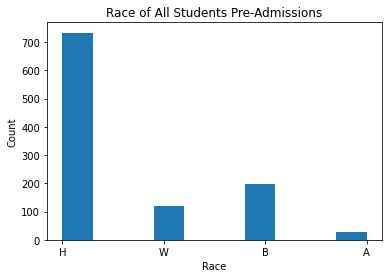

In [370]:
# (Bonus; not worth many points) The same data set can be used for multiple purposes. Instead of estimating the treatment effect of LLS, suppose we want to know about the community/location surrounding LLS. What can you tell us? Be as specific as possible.
# PREDOMINANTLY HISPANIC

#We can look back at our earlier graphs to determine the demographic composition of the community surrounding LLS.

plt.hist(data.race_c.values)
plt.title("Race of All Students Pre-Admissions")
plt.ylabel("Count")
plt.xlabel("Race")

Text(0.5, 0, 'Race')

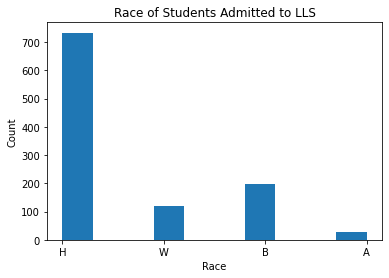

In [371]:
plt.hist(data.race_c.values)
plt.title("Race of Students Admitted to LLS")
plt.ylabel("Count")
plt.xlabel("Race")

In [372]:
#Both the greater pool of students being considered for admission and the students actually admitted to LLS are predominantly hispanic. Therefore, we can confidently say that the community surrounding LLS is predominantly hispanic.

#Furthermore, according to graph X (WRITE NUMBER), we can see that the surrounding community consists mostly of students that are members of the third income bucket (middle class). Lastly, we can extrapolate the gender distribution of the students considered for admission into LLS and state that majority of young folks in the community are female. (See Figure XWRITE). In conclusion, the community surrounding LLS likely is predominantly hispanic, middle class, and female. 



Text(0.5, 0, 'Student Population')

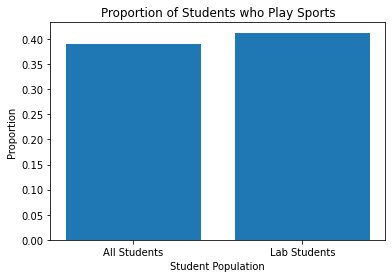

In [373]:
#SEE PROPORTION OF THOSE WHO PLAY SPORTS TO FULL POPULATION, TO SEE IF FAIRLY ATHLETIC COMMUNITYs

data

total_sports_prop = sum(data.plays_sports_c.values)/len(data.plays_sports_c.values)

lls_sports_prop = sum(lab_st.plays_sports_c.values)/len(lab_st.plays_sports_c.values)

plt.bar(x=["All Students", "Lab Students"],height=[total_sports_prop, lls_sports_prop])
plt.title("Proportion of Students who Play Sports")
plt.ylabel("Proportion")
plt.xlabel("Student Population")

In [376]:
results = smf.ols('lab_c ~ C(income_bucket) + dist + gender_c + race_c + C(plays_sports_c) + past_score_log', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lab_c   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.776
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.49e-05
Time:                        22:54:17   Log-Likelihood:                -676.16
No. Observations:                1079   AIC:                             1376.
Df Residuals:                    1067   BIC:                             1436.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               